In [1]:
include("src/SpinonStructure.jl")
include("src/BZMath.jl")
# include("PyrochloreGeometry.jl")
# import .PyrochloreGeometry as geom


Main.BZmath

In [2]:

using .BZmath
using .SpinonStructure
using LinearAlgebra
using StaticArrays
using BenchmarkTools
using Plots
# using Rotations
# import RandomMatrices

In [3]:


function M_analytic_0flux(Jpm, k)
    n = [1,0,0]
    n ./= norm(n)
    
    # R = AngleAxis(π/8, n...)
    R = AngleAxis(0, n...)
    e = Jpm/2*( cos( k'*R*[0,4,4]) + cos( k'*R*[4,0,4]) + cos( k'*R*[4,4,0]) + cos( k'*R*[0,4,-4]) + cos( k'*R*[4,0,-4]) + cos( k'*R*[4,-4,0]) )
    
    return e
end



function M_analytic_0flux_doubled(Jpm, k)
    n = [1,0,0]
    n ./= norm(n)
    
    # R = AngleAxis(π/8, n...)
    R = AngleAxis(0, n...)
    e = Jpm/2*( cos( k'*R*[0,4,4]) + cos( k'*R*[4,0,4]) + cos( k'*R*[4,4,0]) + cos( k'*R*[0,4,-4]) + cos( k'*R*[4,0,-4]) + cos( k'*R*[4,-4,0]) )
    u = rand(RandomMatrices.Haar(2),2)
    return adjoint(u)*diagm([e,e])*u
end


M_analytic_0flux_doubled (generic function with 1 method)

In [4]:
lat_test = geom.PyroPrimitive(4,4*4,16)

@benchmark geom.tetra_idx(lat_test, lat_test.tetra_sites[1+abs(rand(Int64)) % length(lat_test.tetra_sites)] )


BenchmarkTools.Trial: 10000 samples with 873 evaluations.
 Range (min … max):  134.403 ns …  23.445 μs  ┊ GC (min … max): 0.00% … 99.15%
 Time  (median):     137.267 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   147.231 ns ± 248.426 ns  ┊ GC (mean ± σ):  4.16% ±  4.71%

  ▂▆▅▄▇█▅▄▃▃▆▅▂▁▁▂▃▂▁▁▁▁▂▁▁  ▁▂▁▁▁▁▂▂▁▁▂▁▁▁▁                    ▂
  ██████████████████████████████████████████████▇▇▇▇▇▇▆▇▇▆▇▄▅▄▅ █
  134 ns        Histogram: log(frequency) by time        164 ns <

 Memory estimate: 182 bytes, allocs estimate: 6.

In [5]:
lat_test = geom.PyroFCC(4)

@benchmark geom.tetra_idx(lat_test, lat_test.tetra_sites[1+abs(rand(Int64)) % length(lat_test.tetra_sites)] )

BenchmarkTools.Trial: 10000 samples with 900 evaluations.
 Range (min … max):  124.769 ns … 111.114 μs  ┊ GC (min … max): 0.00% … 99.83%
 Time  (median):     134.073 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   147.871 ns ±   1.111 μs  ┊ GC (mean ± σ):  8.01% ±  2.71%

        ▇█                                                       
  ▂▂▄▄▅▄██▅▄▅▆▇▄▃▄▅▇▇▅▅▆▆▅▅▅▄▅▄▄▄▃▄▃▄▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▃
  125 ns           Histogram: frequency by time          157 ns <

 Memory estimate: 128 bytes, allocs estimate: 5.

In [6]:
lat_test = geom.PyroPrimitive(4,4*4,16)
for (J, t) in enumerate(lat_test.tetra_sites)
    J2 = geom.tetra_idx(lat_test, t-geom.primitive_basis*lat_test.L)
    if J2 != J
        println("Error: $(J) -> $(J2)")
    end
end

In [7]:
for mu=1:4
    tmp = geom.fcc_Dy[mu] + geom.diamond[1] + 8 .*[4, -9, -11]
    # tmp = tetra_pos .& 0x4
    println(1 + ( (tmp[2]&0x4) >> 2 | (tmp[1]&0x4 )>> 1  ))
end

1
2
3
4


In [8]:
high_symmetry_points = Dict(
    "\\Gamma"=> [0.,0.,0.],
    "X"=> [1.,0.,0.],
    "W"=> [1.,0.5,0.],
    "K"=> [0.75,0.75,0.],
    "L"=> [0.5,0.5,0.5],
    "U"=> [1.0, 0.25,0.25]
)

high_symmetry_points_2 = Dict(
    "\\Gamma"=> [0.,0.,0.],
    "X"=> [1.,0.,0.],
    "W"=> [1.,0.5,0.],
    "K"=> [0.75,0.75,0.],
    "L"=> [0.5,0.5,0.5],
    "U"=> [1.0, 0.25,0.25]
)

path = generate_path(high_symmetry_points, split("\\Gamma X W K \\Gamma L U W"), points_per_unit=30, K_units=4π/8);

In [9]:
lat_min = geom.PyroPrimitive(1,1,1)
sim_0 = SimulationParameters("TEST_0flux", lattice=lat_min, A=zeros(1,4), Jpm=-0.046, B=[0.,0.,0.])


SimulationParameters([0.0 0.0 0.0 0.0], -0.046, [0.0, 0.0, 0.0], Main.SpinonStructure.PyrochloreGeometry.PyroPrimitive([1, 1, 1], SVector{3, Int64}[[0, 0, 0], [2, 2, 2]], SVector{3, Int64}[[1, 1, 1], [1, -1, -1], [-1, 1, -1], [-1, -1, 1]]), 2.0, 10000, "TEST_0flux")

In [10]:
λ_0 = SpinonStructure.calc_lambda(sim_0)
    

0.14163831240678004

In [11]:
path = generate_path(geom.high_symmetry_points, split("\\Gamma X W K \\Gamma L U W"), points_per_unit=150, K_units=2π/8);


In [12]:
using Printf




function plot_spinons(f;color=:black)
    E = reduce(vcat, map(f, path.K )')

    plot!(path.t,E,legend=false,color=color,lw=0.5)
    xticks!(path.ticks_t, path.ticks_label)
    ylims!(0.,maximum(E))

    # bstr = @sprintf("[%.3f,%.3f,%.3f]",sim.B[1],sim.B[2],sim.B[3])  
    # if norm( abs.(sim.B/norm(sim.B))- [1,1,1]/√3) < 1e-8
    #     bstr = @sprintf("%.3f [1,1,1]/\\sqrt{3}", norm(sim.B) )
    # elseif norm( abs.(sim.B/norm(sim.B))- [1,1,0]/√2) < 1e-8
    #     bstr = @sprintf("%.3f [1,1,0]/\\sqrt{2}", norm(sim.B))
    # end
    # title!(@sprintf("\$J_\\pm=%.3fJ_{yy}, B=%s J_{yy}\$",sim.Jpm,bstr)  )
    # savefig(@sprintf("figures/dispersion_%s?J_pm=%.3f?B=[%.3f,%.3f,%.3f].pdf",sim.name,sim.Jpm,sim.B[1],sim.B[2],sim.B[3])  )
    
    return plot!()
end

plot_spinons (generic function with 1 method)

In [13]:
function spinon_dispersion_analytic(k, sim)
    ϵ = M_analytic_0flux(sim.Jpm, k)
    return sqrt( 2 .*(ϵ + sim.λ))
end
plot()
f1 = k-> spinon_dispersion(k, sim_0, λ_0 )[1]
f_analy = k-> spinon_dispersion_analytic(k,sim_0)
plot_spinons(f1,color=:red)

spinon_dispersion_analytic (generic function with 1 method)

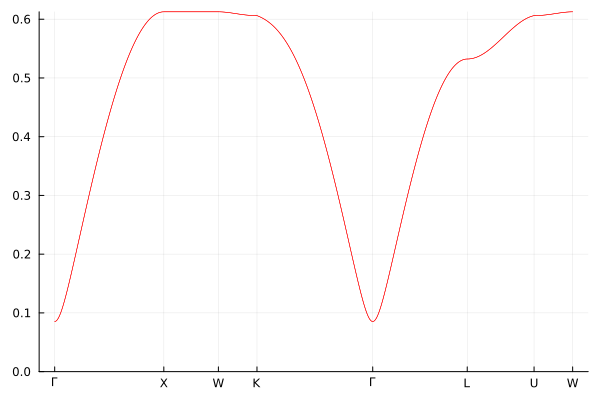

In [14]:
plot()
f1 = k-> spinon_dispersion(k, sim_0, λ_0 )[1]
f_analy = k-> spinon_dispersion_analytic(k,sim_0)
plot_spinons(f1,color=:red)
# plot_spinons(f1,color=:black)

In [15]:
const integration_settings = Dict(
    "very_fast" => IntegrationParameters(n_K_samples=10,   broadening_dE=0.1),
    "fast" =>   IntegrationParameters(n_K_samples=100,  broadening_dE=0.05),
    "slow" =>      IntegrationParameters(n_K_samples=1000, broadening_dE=0.02),
    "very_slow" => IntegrationParameters(n_K_samples=10000,broadening_dE=0.02)
)

Dict{String, IntegrationParameters} with 4 entries:
  "slow"      => IntegrationParameters(1000, 0.02)
  "fast"      => IntegrationParameters(100, 0.05)
  "very_slow" => IntegrationParameters(10000, 0.02)
  "very_fast" => IntegrationParameters(10, 0.1)

In [16]:
using ProgressMeter

###########
# expensive calculations
"""
calc_spectral_weight_along_path(sim::SimulationParameters,
    ip::IntegrationParameters, Egrid::Vector{Float64}, path::BZPath)

    @param sim the simulation parameters
    @param λ the chemical potential parameter
    @param ip the numerical constants, passed directly to spectral_weight
    @param Egrid the grid for energy values
    @param path the path through the Brillouin zone
    @param g_tensor the matrix such that, with respect to local axes, m = g S

    Saves the results to
"""
function calc_spectral_weight_along_path(
    output_dir::String;
    sim::SimulationParameters, λ::Float64,
    ip::IntegrationParameters, Egrid::Vector{Float64}, path::BZPath,
    g_tensor=nothing
    )
    
    num_K = length(path.K)
    
    Spm = zeros(ComplexF64, num_K, length(Egrid))
    Spp = zeros(ComplexF64, num_K, length(Egrid))
    Smagnetic = zeros(Float64, num_K, length(Egrid))
    bounds = zeros(Float64, num_K, 2)
    
    p = Progress(num_K,desc="Spectral weight: ")

    Threads.@threads for I = 1:num_K
        k = path.K[I]*0.5
        q = SVector(k[1], k[2], k[3])
        # hard-coded DO g-tensor
        
        # no race condition here, yay
        # Spm[I, :], Spp[I, :], Smagnetic[I, :], bounds[I,:] = spectral_weight(q, Egrid, sim, λ, ip, g_tensor )
        tmp_intensity = spectral_weight(q, Egrid, sim, λ, ip, g_tensor )
        Spm[I, :] .= tmp_intensity.Sqω_pm
        Spp[I, :] .= tmp_intensity.Sqω_pp
        Smagnetic[I, :] .= tmp_intensity.Sqω_magnetic
        bounds[I,:] .= tmp_intensity.bounds
        
        next!(p)
    end
    finish!(p)

    
    # save the data
    return save_SQW(output_dir, 
        Spm=Spm,
        Spp=Spp,
        Smagnetic=Smagnetic, 
        bounds=bounds,
        BZ_path=path,
        Egrid=collect(Egrid),
        sim=sim, 
        ip=ip
        )
end




calc_spectral_weight_along_path

In [17]:

function save_SQW(output_dir::String;
        Spm::Union{Matrix{ComplexF64},Vector{ComplexF64}},
        Spp::Union{Matrix{ComplexF64},Vector{ComplexF64}},
        Smagnetic::Union{Matrix{Float64},Vector{Float64}},
        bounds::Union{Nothing,Matrix{Float64}},
        Egrid::Vector{Float64},
        BZ_path::Union{Nothing,BZPath},
        sim::SimulationParameters, 
        ip::IntegrationParameters,
        prefix="SQW")

    name = output_dir*"/"*prefix*sim_identifier(sim)*".jld"
    rm(name, force=true)
    jldopen(name, "w") do file
        g1 = create_group(file, "integration_parameters")
        g1["n_K_samples"] = ip.n_K_samples
        g1["broadening_dE"] = ip.broadening_dE
        g1["version"] = 1.0
#        g1["BZ_grid_density"] = ip.BZ_grid_density

        g = create_group(file, "physical_parameters")
        g["name"] = sim.name
        g["emergent_fluxes"] = calc_fluxes(sim.lat, sim.A)
        g["gauge"] = sim.A
        g["Jpm"] = sim.Jpm
        g["B"] = sim.B
        # g["lambda"] = sim.λ
        g["L"]=sim.lat.L

        d = create_group(file, "intensity") 
        d["Spm"] = Spm
        d["Spp"] = Spp
        d["Smagnetic"] = Smagnetic
        if bounds != nothing
            d["bounds"] = bounds
        end
        # a list of K points, such that the I'th S slics corresponds to the I'th K point
        if BZ_path != nothing
            d["Q_list"] = BZ_path.K 
            d["tau"] = BZ_path.t
            d["ticks_tau"] = BZ_path.ticks_t
            d["ticks_label"] = BZ_path.ticks_label
        end
        d["W"] = Egrid
    end
    return name
end

save_SQW (generic function with 1 method)

In [18]:

corr_at((@SVector [0.,0.,0.]), (@SVector [1.,2.,3.]), sim_0, λ_0)

LoadError: MethodError: no method matching corr_at(::SVector{3, Float64}, ::SVector{3, Float64}, ::SimulationParameters, ::Float64)

[0mClosest candidates are:
[0m  corr_at(::SVector{3, Float64}, ::SVector{3, Float64}, [91m::CompiledModel[39m, ::Float64)
[0m[90m   @[39m [35mMain.SpinonStructure[39m [90m~/gh/spinon-calc/src/[39m[90m[4mSpinonStructure.jl:440[24m[39m
[0m  corr_at(::SVector{3, Float64}, ::SVector{3, Float64}, [91m::CompiledModel[39m, ::Float64, [91m::Union{Nothing, SMatrix{3, 3, Float64}}[39m)
[0m[90m   @[39m [35mMain.SpinonStructure[39m [90m~/gh/spinon-calc/src/[39m[90m[4mSpinonStructure.jl:440[24m[39m


In [19]:


function plot_spin_corr(data)
    d = data["intensity"]
    p = heatmap(d["tau"],d["W"],real.(d["Spm"]'))
    plot!(d["tau"], d["bounds"], linecolor=:white)
    xticks!(d["ticks_tau"],d["ticks_label"])
    plot!(legend=nothing)

    sim =data["physical_parameters"]

    B = sim["B"]
    vline!(d["ticks_tau"], linecolor=:white, linestyle=:dash)
    
    bstr = @sprintf("[%.3f,%.3f,%.3f]",B[1],B[2],B[3])  
    if norm( abs.(B/norm(B))- [1,1,1]/√3) < 1e-8
        bstr = @sprintf("%.3f [1,1,1]/\\sqrt{3}", norm(B) )
    elseif norm( abs.(B/norm(B))- [1,1,0]/√2) < 1e-8
        bstr = @sprintf("%.3f [1,1,0]/\\sqrt{2}", norm(B))
    end
    title!(@sprintf("\$J_\\pm=%.3fJ_{yy}, B=%s J_{yy}\$",sim["Jpm"],bstr))
    # savefig(@sprintf("figures/specweight_%s?J_pm=%.3f?B=[%.3f,%.3f,%.3f].pdf",sim["name"],sim["Jpm"],B[1],B[2],B[3])  )
    return p
end



plot_spin_corr (generic function with 1 method)

In [20]:
using HDF5
using JLD

high_symmetry_points = Dict(
    "\\Gamma"=> [0.,0.,0.],
    "X"=> [1.,0.,0.],
    "W"=> [1.,0.5,0.],
    "K"=> [0.75,0.75,0.],
    "L"=> [0.5,0.5,0.5],
    "U"=> [1.0, 0.25,0.25]
)


path = generate_path(high_symmetry_points, split("\\Gamma X W K \\Gamma L U W"), points_per_unit=30, K_units=π/2)

res = calc_spectral_weight_along_path("output", 
    sim=sim_0, 
    λ=λ_0,
    ip=integration_settings["slow"],
    Egrid=collect(range(0,1.5,100)),
    path=path,
    g_tensor = (@SMatrix[0. 0 1.; 0 0 0; 0 0 0]) )

[ Info: Precompiling FileIOExt [f5f51d8f-5827-5d2e-939b-192fcd6ec70c]


LoadError: TaskFailedException

[91m    nested task error: [39mMethodError: no method matching spectral_weight(::SVector{3, Float64}, ::Vector{Float64}, ::SimulationParameters, ::Float64, ::IntegrationParameters, ::SMatrix{3, 3, Float64, 9})
    
    [0mClosest candidates are:
    [0m  spectral_weight(::SVector{3, Float64}, ::Vector{Float64}, [91m::CompiledModel[39m, ::Float64, ::IntegrationParameters, ::Union{Nothing, SMatrix{3, 3, Float64}})
    [0m[90m   @[39m [35mMain.SpinonStructure[39m [90m~/gh/spinon-calc/src/[39m[90m[4mSpinonStructure.jl:612[24m[39m
    [0m  spectral_weight(::SVector{3, Float64}, ::Vector{Float64}, [91m::CompiledModel[39m, ::Float64, ::IntegrationParameters)
    [0m[90m   @[39m [35mMain.SpinonStructure[39m [90m~/gh/spinon-calc/src/[39m[90m[4mSpinonStructure.jl:612[24m[39m
    
    Stacktrace:
     [1] [0m[1mmacro expansion[22m
    [90m   @[39m [90m./[39m[90m[4mIn[16]:41[24m[39m[90m [inlined][39m
     [2] [0m[1m(::var"#103#threadsfor_fun#8"{var"#103#threadsfor_fun#7#9"{SimulationParameters, Float64, IntegrationParameters, Vector{Float64}, BZPath, SMatrix{3, 3, Float64, 9}, Progress, Matrix{Float64}, Matrix{Float64}, Matrix{ComplexF64}, Matrix{ComplexF64}, UnitRange{Int64}}})[22m[0m[1m([22m[90mtid[39m::[0mInt64; [90monethread[39m::[0mBool[0m[1m)[22m
    [90m   @[39m [36mMain[39m [90m./[39m[90m[4mthreadingconstructs.jl:215[24m[39m
     [3] [0m[1m#103#threadsfor_fun[22m
    [90m   @[39m [90m./[39m[90m[4mthreadingconstructs.jl:182[24m[39m[90m [inlined][39m
     [4] [0m[1m(::Base.Threads.var"#1#2"{var"#103#threadsfor_fun#8"{var"#103#threadsfor_fun#7#9"{SimulationParameters, Float64, IntegrationParameters, Vector{Float64}, BZPath, SMatrix{3, 3, Float64, 9}, Progress, Matrix{Float64}, Matrix{Float64}, Matrix{ComplexF64}, Matrix{ComplexF64}, UnitRange{Int64}}}, Int64})[22m[0m[1m([22m[0m[1m)[22m
    [90m   @[39m [90mBase.Threads[39m [90m./[39m[90m[4mthreadingconstructs.jl:154[24m[39m

...and 3 more exceptions.


In [21]:
data = load(res)
plot_spin_corr(data)

LoadError: UndefVarError: `res` not defined